In [178]:
import numpy as np

Prepare

In [179]:

class Perceptron: 
    def fit(self, X, y, w_init, n_iter=100):
        
        n_samples = X.shape[0]
        
        # Add 1 for the bias term
        self.weights = [np.ravel(w_init)]
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        mis_points = []

        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights[-1], X[j,:]) <= 0:
                    mis_points.append(j)
                    new_weights = self.weights[-1] + y[j]*X[j,:]
            
            self.weights.append(new_weights)
    
        return (np.array(self.weights), np.array(mis_points))

    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)

In [180]:
perceptron = Perceptron()

## Utils Func

In [229]:
import matplotlib.pyplot as plt

In [230]:
plt.style.use('bmh')

In [245]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -50, 50
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-50, 50], 'k')

In [246]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
# from IPython.display import clear_output

In [247]:
def viz_alg_1d_2(X,y,w,m): # 2 class
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]
    it = len(w)
    fig, ax = plt.subplots()
    
    def update(i):
        ani = plt.cla()
        #points
        # ani = plt.plot(X0, 'b^', markersize = 8, alpha = .8)
        # ani = plt.plot(X1, 'ro', markersize = 8, alpha = .8)
        ani = plt.plot(X0, 'b^')
        ani = plt.plot(X1, 'ro')

        ani = plt.axis([min(X[:,0]) - 10 , max(X[:,0]) + 10, min(X[:,1]) - 10 , max(X[:,1] + 10)])

        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        
        # draw one misclassified point
        circle = plt.Circle(X[m[i],:], 0.15, color='k', fill = False)
        ax.add_artist(circle)

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)

        # clear_output(wait = True)
        # plt.pause(0.0001)

        return ani, ax
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=100)
    # save 
    anim.save('pla_vis.gif', dpi = 100, fps = 5, writer = 'pillow')
    # plt.show()

In [248]:
from sklearn.datasets import make_classification, make_circles

## Linearly Separable

In [249]:
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)

In [250]:
w_init = np.random.randn(X.shape[1] + 1,1)

In [251]:
w, mis_points = perceptron.fit(X,y,w_init)

Visualization

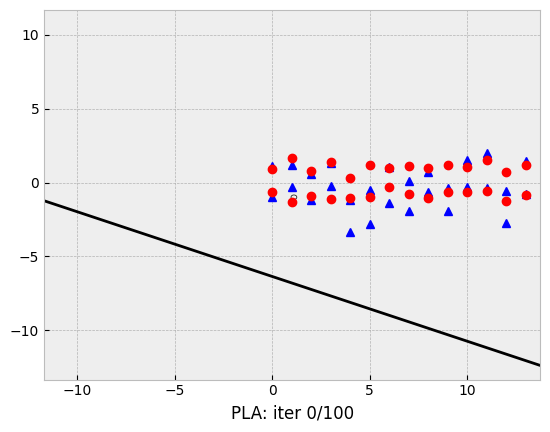

In [252]:
viz_alg_1d_2(X,y,w,mis_points)